# Data Wrangling and EDA for Indigenous Australian Population and Australian Immunisation rates data







## Table of Content

1. [Investigate the size of Indigenous Australian Population](#1)
    - 1.1 [Investigate the Distribution of Indigenous Autralians](#1.1)
    - 1.2 [Investigate the Ages of Indigenous Australians](#1.2)
2. [Exploratory Analysis on Australian Immunisation rates](#2)
    - 2.1 [Values and Variables](#2.1)
    - 2.2 [Variations in rates over Time, Age and Location](#2.2)

## Install packages (if needed)

In [11]:
# install.packages('googleVis')
# install.packages('visdat')
# install.packages('dplyr')

## 1. Investigate the size of Indigenous Australian Population <a class="anchor" id="1"></a>

First, we need to perform some data wrangling, to ensure the quality of the data

In [2]:
#Load tidyverse library
library(tidyverse)

In [21]:
#Load the data
indig_byregion<-read_csv('IndigAusPopData_byregion.csv')
indig_byregion

#Take a look at the structure of the data
glimpse(indig_byregion)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  INDIGENOUS_REGION = col_double(),
  `Indigenous region` = col_character(),
  Age = col_character(),
  TIME = col_double(),
  Value = col_double(),
  `Projection series` = col_character(),
  Frequency = col_character()
)



INDIGENOUS_REGION,Indigenous region,Age,TIME,Value,Projection series,Frequency
801,ACT,Oct-14,2016,694,Series A,Annual
801,ACT,Oct-14,2017,696,Series A,Annual
801,ACT,Oct-14,2018,697,Series A,Annual
801,ACT,Oct-14,2019,722,Series A,Annual
801,ACT,Oct-14,2020,776,Series A,Annual
801,ACT,Oct-14,2021,792,Series A,Annual
801,ACT,Oct-14,2022,812,Series A,Annual
801,ACT,Oct-14,2023,857,Series A,Annual
801,ACT,Oct-14,2024,859,Series A,Annual
801,ACT,Oct-14,2025,841,Series A,Annual


Rows: 8,288
Columns: 7
$ INDIGENOUS_REGION   <dbl> 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, ~
$ `Indigenous region` <chr> "ACT", "ACT", "ACT", "ACT", "ACT", "ACT", "ACT", "~
$ Age                 <chr> "Oct-14", "Oct-14", "Oct-14", "Oct-14", "Oct-14", ~
$ TIME                <dbl> 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 20~
$ Value               <dbl> 694, 696, 697, 722, 776, 792, 812, 857, 859, 841, ~
$ `Projection series` <chr> "Series A", "Series A", "Series A", "Series A", "S~
$ Frequency           <chr> "Annual", "Annual", "Annual", "Annual", "Annual", ~


There are some issues in the data that we need to address. We can already see some peculiar values under Age column, so let's investigate further.

In [22]:
levels(factor(indig_byregion$Age))

[1] "0 - 4"       "15 - 19"     "20 - 24"     "25 - 29"     "30 - 34"    
 [6] "35 - 39"     "40 - 44"     "45 - 49"     "5-Sep"       "50 - 54"    
[11] "55 - 59"     "60 - 64"     "65 and over" "Oct-14"

From here we can infer that the values under Age column is entered in the form of age group. However, there are 2 groups of values that are entered incorrectly. “5-Sep” is supposed to be “5-9” and “Oct-14” is supposed to be “10-14”. We make the changes accordingly

In [23]:
indig_byregion$Age[indig_byregion$Age=='5-Sep']<-'5 - 9'
indig_byregion$Age[indig_byregion$Age=='Oct-14']<-'10 - 14'

Now that the label of age groups is properly taken care of, we should sort the data in the ascending order of age group, so the arrangement of the data looks better

In [24]:
#Create Age_f column to rearrange the data in the ascending order of age group
indig_byregion$Age_f<-factor(indig_byregion$Age,
        levels=c("0 - 4","5 - 9" ,"10 - 14","15 - 19","20 - 24","25 - 29",
               "30 - 34","35 - 39","40 - 44","45 - 49","50 - 54","55 - 59",
               "60 - 64","65 and over"))

#Reorder the data in the ascending order of age group
indig_byregion<-indig_byregion[order(indig_byregion$Age_f),]

#Remove Age_f column when we are done
indig_byregion<-indig_byregion[,!(names(indig_byregion)=='Age_f')]

Now, we check if there are any missing values in the data

In [25]:
library(visdat)

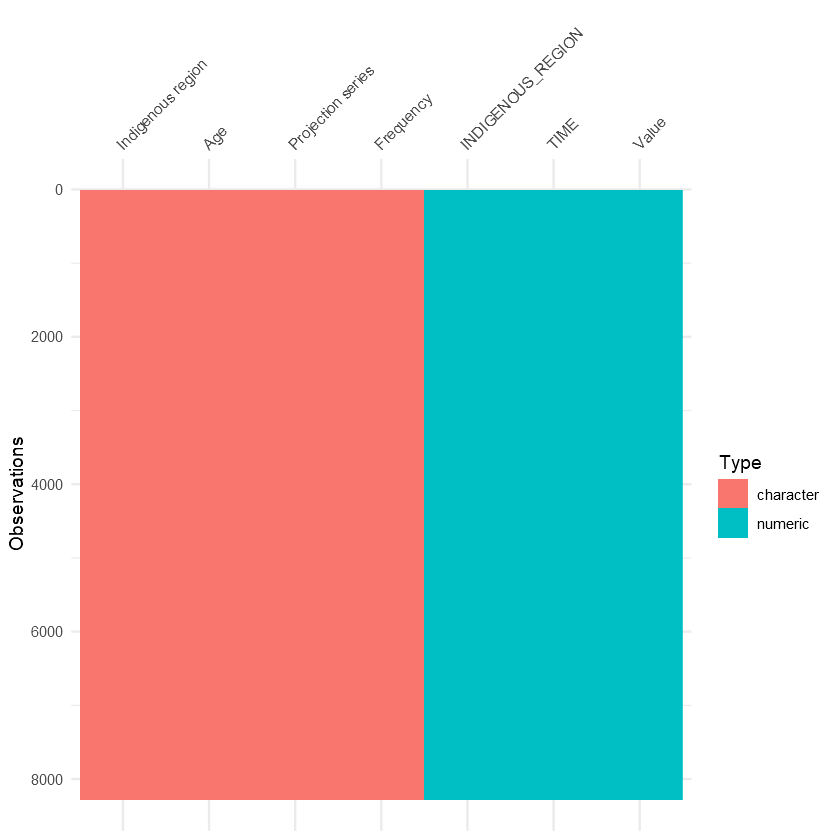

In [26]:
vis_dat(indig_byregion)
#There are no missing values

We check if the range of `TIME` and `Value` columns are within a reasonable range

In [27]:
range(indig_byregion$TIME)

[1] 2016 2031

In [28]:
range(indig_byregion$Value)

[1]    86 16347

Both are within the acceptable, specified range, so no outliers that need to be taken care of.

In [30]:
#Remove the unnecessary column INDIGENOUS_REGION
indig_byregion<-indig_byregion[,!(names(indig_byregion)=='INDIGENOUS_REGION')]

#Take a look at the data
indig_byregion

Indigenous region,Age,TIME,Value,Projection series,Frequency
ACT,0 - 4,2016,899,Series A,Annual
ACT,0 - 4,2017,901,Series A,Annual
ACT,0 - 4,2018,882,Series A,Annual
ACT,0 - 4,2019,893,Series A,Annual
ACT,0 - 4,2020,913,Series A,Annual
ACT,0 - 4,2021,947,Series A,Annual
ACT,0 - 4,2022,985,Series A,Annual
ACT,0 - 4,2023,1028,Series A,Annual
ACT,0 - 4,2024,1072,Series A,Annual
ACT,0 - 4,2025,1115,Series A,Annual


The data is now fit for further analysis

### 1.1 Investigate the Distribution of Indigenous Autralians <a class="anchor" id="1.1"></a>

### 1.2 Investigate the Ages of Indigenous Australians <a class="anchor" id="1.2"></a>

## 2. Exploratory Analysis on Australian Immunisation rates <a class="anchor" id="2"></a>

### 2.1 Values and Variables <a class="anchor" id="2.1"></a>

### 2.2 Variations in rates over Time, Age and Location <a class="anchor" id="2.2"></a>